<a href="https://colab.research.google.com/github/fernandocillo/EG940/blob/main/S6_extra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import librosa

from IPython.display import Audio

sample_rate=44100



---



# Amostra 1:
Bem-Te-Vi


**Origem do som:** pássaro Bem-Te-Vi

**Rótulos:** estridente, natural, repetitivo

In [2]:
audio1='/content/drive/MyDrive/EG940/S6/BemTeVi.wav'
bem_te_vi, sr = librosa.load(audio1, sr=sample_rate, mono=True)

Audio(bem_te_vi, rate=sr)



---



# Amostra 2:
Duolingo

**Origem do som:** Trompete (efeitos sonoros do Duolingo)

**Rótulos:** metálico, sopros, consonante 

In [3]:

audio2='/content/drive/MyDrive/EG940/S6/DuolingoFX.wav'
duolingo, sr = librosa.load(audio2, sr=sample_rate, mono=True)

Audio(duolingo, rate=sr)



---



# Amostra 3:

Bobinas de Tesla

**Origem do som:** Quarteto de bobinas de Tesla tocando "Get Lucky" - Daft Punk

**Rótulos:** ruidoso, eletrônico, frequências médias

In [7]:

audio3='/content/drive/MyDrive/EG940/S6/GetLucy_TeslaCoil.wav'
tesla_coil, sr = librosa.load(audio3, sr=sample_rate, mono=True)

Audio(tesla_coil, rate=sr)



---



# Amostra 4:
M. Shadows

**Origem do som:** Voz humana gritando/cantando (M. Shadows em "Nightmare" - Avenged Sevenfold)

**Rótulos:** áspero, prolongado, eco

In [5]:

audio4='/content/drive/MyDrive/EG940/S6/Nightmare.wav'
nightmare, sr = librosa.load(audio4, sr=sample_rate, mono=True)

Audio(nightmare, rate=sr)



---



# Amostra 5:
Theremin

**Origem do som:** Riff de Theremin de Paul Tunner em "Good Vibrations" - The Beach Boys

**Rótulos:** etéreo, estridente, vibrato

In [9]:

audio5='/content/drive/MyDrive/EG940/S6/good_vib_mono_16bit.wav'
good_vib, sr = librosa.load(audio5, sr=sample_rate, mono=True)

Audio(good_vib, rate=sr)



---



# Análise de Sinais

In [18]:
amostras = [bem_te_vi, duolingo, tesla_coil, nightmare, good_vib]

## Centroide

In [60]:
def centroide(x):
  y = librosa.feature.spectral_centroid(x)
  plt.figure(figsize=(12,6))
  plt.plot(y.T)
  plt.show()
  return y

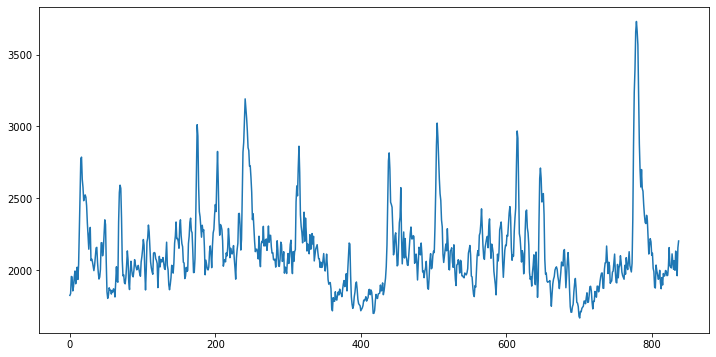

In [61]:
c = centroide(amostras[0])

## Cepstro

In [29]:
def cepstro_no_tempo(x, frame_len):
  i = 0
  e = []
  while (i+1)*frame_len < len(x):
    X = np.abs(np.fft.fft(x[i*frame_len : (i+1)*frame_len] * np.hanning(frame_len), frame_len*4))
    cepstro = np.abs(np.fft.ifft(np.log10(X)))
    e.append(cepstro)
    i += 1

  e = np.array(e)
  return e

<Figure size 432x288 with 0 Axes>

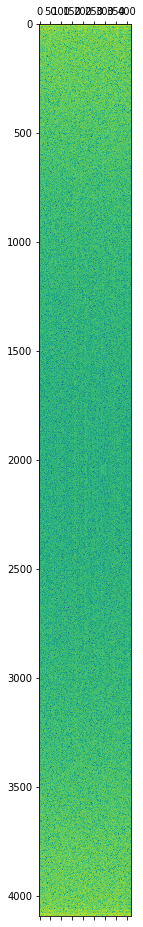

In [47]:
c = cepstro_no_tempo(bem_te_vi, 1024)

c.shape
plt.figure()
plt.matshow(np.log10(c[:,1:]).T)
plt.show()

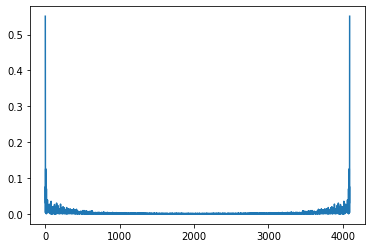

In [46]:
plt.figure()
plt.plot(c[10,1:])
plt.show()

## Filtro na escala Mel

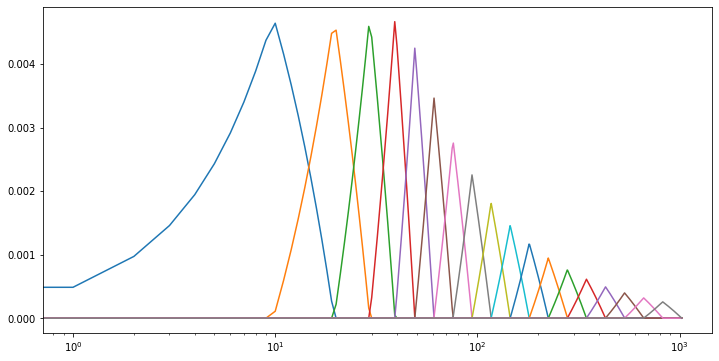

In [54]:
frame_len = 1024
fb = librosa.filters.mel(sr, n_fft=frame_len*2, n_mels=18)

freqs = np.linspace(0, sr, frame_len*2)
plt.figure(figsize=(12,6))
plt.plot(fb.T)
plt.xscale('log')
plt.show()

In [70]:
def filtro_Mel(x, frame_len, mels):
  fb = librosa.filters.mel(sr, n_fft=frame_len*2, n_mels=mels)

  X = librosa.stft(x, n_fft=frame_len*2, hop_length=int(frame_len/2), win_length=frame_len)
  plt.figure()
  plt.matshow(np.abs(X))
  plt.show()
  return

<Figure size 432x288 with 0 Axes>

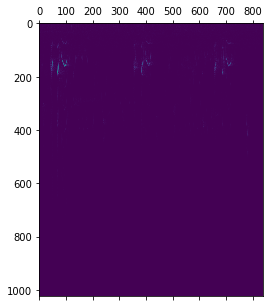

In [74]:
filtro_Mel(bem_te_vi, 1024, 18)

# Envoltoria

## Forma de onda

In [75]:
def forma_de_onda(x):
  t = np.linspace(0, len(x)/sr, len(x))
  plt.figure()
  plt.plot(t,x)
  plt.show()
  return

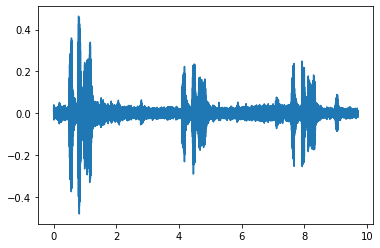

In [76]:
forma_de_onda(bem_te_vi)

## Forma de onda e envoltórias

In [77]:
def rms(_x):
  return np.sqrt(np.mean(_x**2))

In [78]:
def max(_x):
  return np.max(np.abs(_x))

In [79]:
def env(x, frame_len, func=rms):
  i = 0
  e = []
  while (i+1)*frame_len < len(x):
    rms_local = func(x[i*frame_len : (i+1)*frame_len])
    e.append(rms_local)
    i += 1

  e = np.array(e)
  return e

In [92]:
def envolt(x):
  er = env(x, 1024, rms)
  em = env(x, 1024, max)
  te = np.linspace(0, len(x)/sr, len(er))
  plt.figure()
  plt.plot(te, er, label='RMS')
  plt.plot(te, em, label='MAX')
  plt.legend()
  plt.semilogy()
  plt.show()
  return

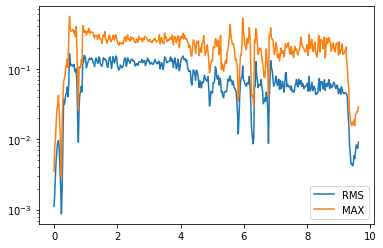

In [93]:
envolt(nightmare)

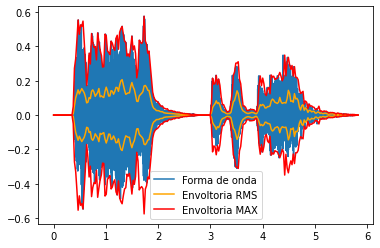

In [95]:
x=duolingo

t = np.linspace(0, len(x)/sr, len(x))
er = env(x, 1024, rms)
em = env(x, 1024, max)
te = np.linspace(0, len(x)/sr, len(er))
plt.figure()
plt.plot(t,x, label='Forma de onda')
plt.plot(te, er, color='orange', label='Envoltoria RMS')
plt.plot(te, -er, color='orange')
plt.plot(te, em, color='red', label='Envoltoria MAX')
plt.plot(te, -em, color='red')
plt.legend()
plt.show()